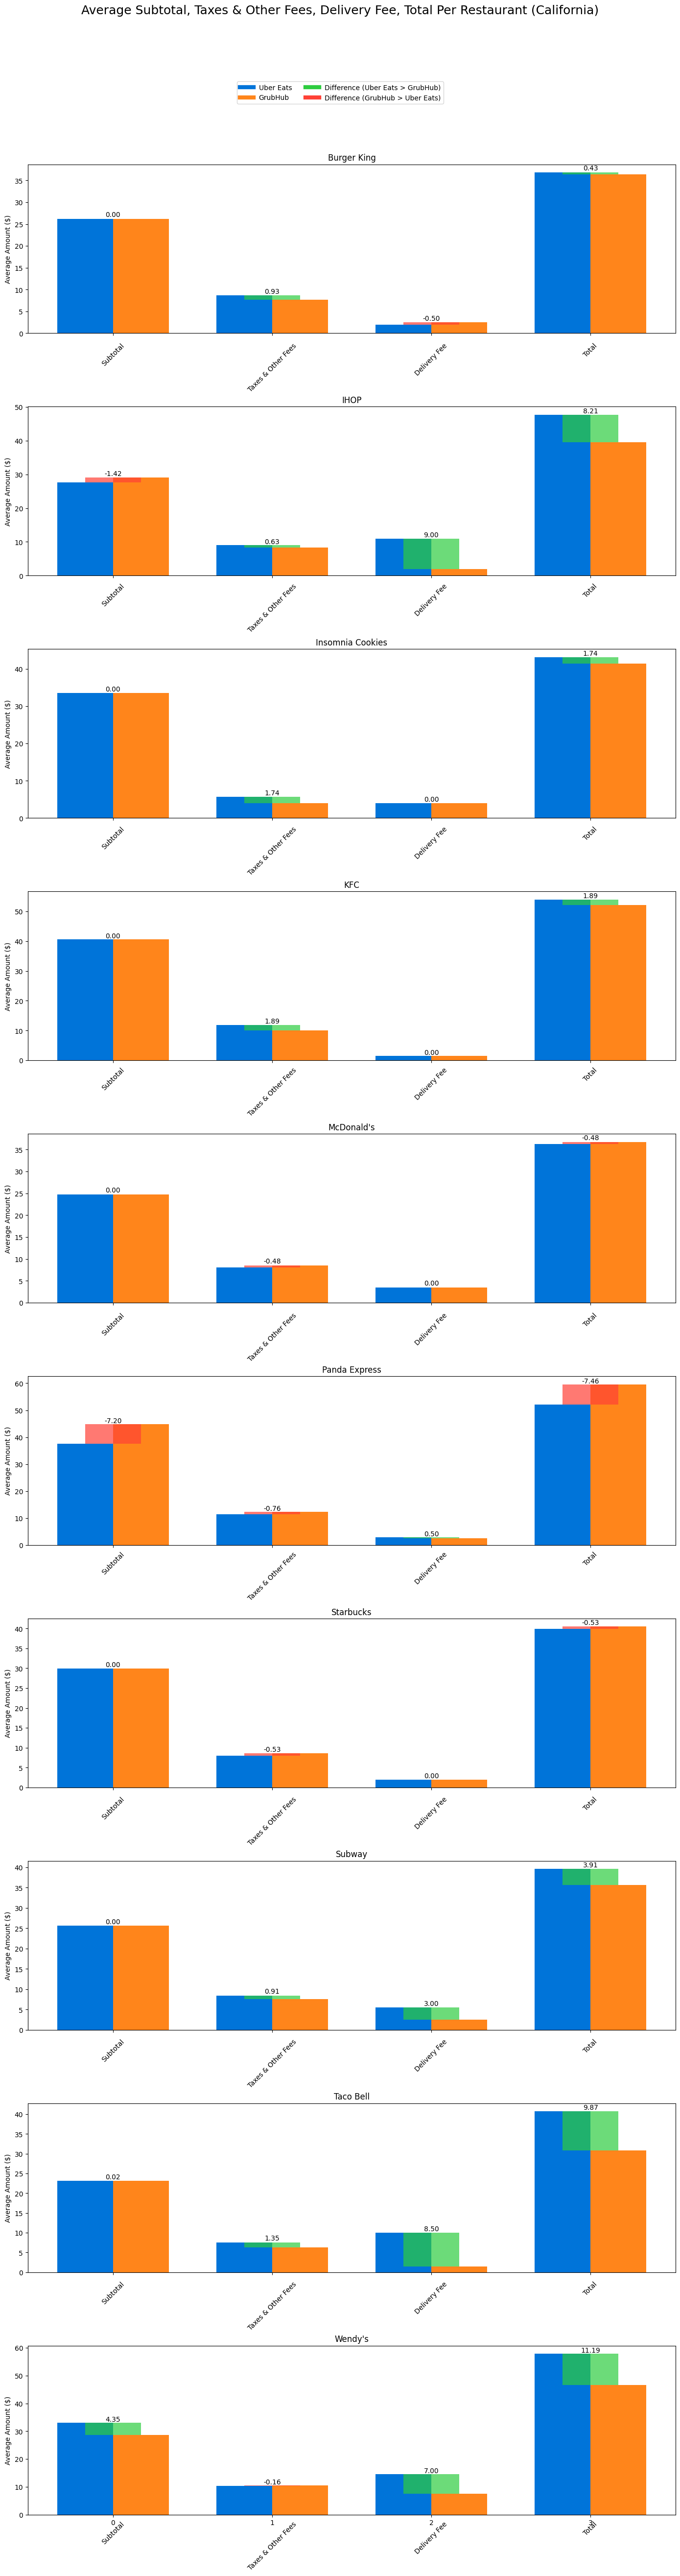

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

uber_df = pd.read_csv('/content/UberEats_California_Orders.csv')
grubhub_df = pd.read_csv('/content/Grubhub_California_Orders.csv')

for col in ['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']:
    uber_df[col] = uber_df[col].replace('[\$,]', '', regex=True).astype(float)
    grubhub_df[col] = grubhub_df[col].replace('[\$,]', '', regex=True).astype(float)

uber_avg = uber_df.groupby('Restaurant Name')[['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']].mean().reset_index()
grubhub_avg = grubhub_df.groupby('Restaurant Name')[['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']].mean().reset_index()
merged = pd.merge(uber_avg, grubhub_avg, on='Restaurant Name', suffixes=('_Uber', '_Grubhub'))

# 1. Multi-Bar Chart for Each Restaurant (Uber Eats vs GrubHub)
categories = ['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']
x = np.arange(len(categories))
bar_width = 0.35
fig, axes = plt.subplots(len(merged), 1, figsize=(14, len(merged) * 5), sharex=True)

for i, row in merged.iterrows():
    ax = axes[i]

    ax.bar(x - bar_width/2, row[[f'{cat}_Uber' for cat in categories]], bar_width, label='Uber Eats', color='#0074D9')
    ax.bar(x + bar_width/2, row[[f'{cat}_Grubhub' for cat in categories]], bar_width, label='GrubHub', color='#FF851B')

    for j, cat in enumerate(categories):
        diff = row[f'{cat}_Uber'] - row[f'{cat}_Grubhub']
        color = '#2ECC40' if diff >= 0 else '#FF4136'
        ax.bar(x[j], abs(diff), bar_width, bottom=min(row[f'{cat}_Uber'], row[f'{cat}_Grubhub']), color=color, alpha=0.7)
        ax.text(x[j], max(row[f'{cat}_Uber'], row[f'{cat}_Grubhub']) + 0.5, f'{diff:.2f}', ha='center', fontsize=10)
        ax.text(x[j], -2, cat, ha='center', fontsize=10, color='black', rotation=45, verticalalignment='top')

    ax.set_ylabel('Average Amount ($)')
    ax.set_title(f'{row["Restaurant Name"]}', fontsize=12, rotation=0, ha='center')
    ax.set_xticks(x)

plt.suptitle('Average Subtotal, Taxes & Other Fees, Delivery Fee, Total Per Restaurant (California)', fontsize=18, y=1.05)

handles = [
    plt.Line2D([0], [0], color='#0074D9', lw=6, label='Uber Eats'),
    plt.Line2D([0], [0], color='#FF851B', lw=6, label='GrubHub'),
    plt.Line2D([0], [0], color='#2ECC40', lw=6, label='Difference (Uber Eats > GrubHub)'),
    plt.Line2D([0], [0], color='#FF4136', lw=6, label='Difference (GrubHub > Uber Eats)'),
]
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2)

plt.subplots_adjust(hspace=0.5, top=0.6)
plt.tight_layout()
plt.show()


<ipython-input-2-fbd9ab6b80be>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i] - bar_width/2, uber_avg[i] + 0.5, f'{uber_avg[i]:.2f}', ha='center', fontsize=10)
<ipython-input-2-fbd9ab6b80be>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i] + bar_width/2, grubhub_avg[i] + 0.5, f'{grubhub_avg[i]:.2f}', ha='center', fontsize=10)


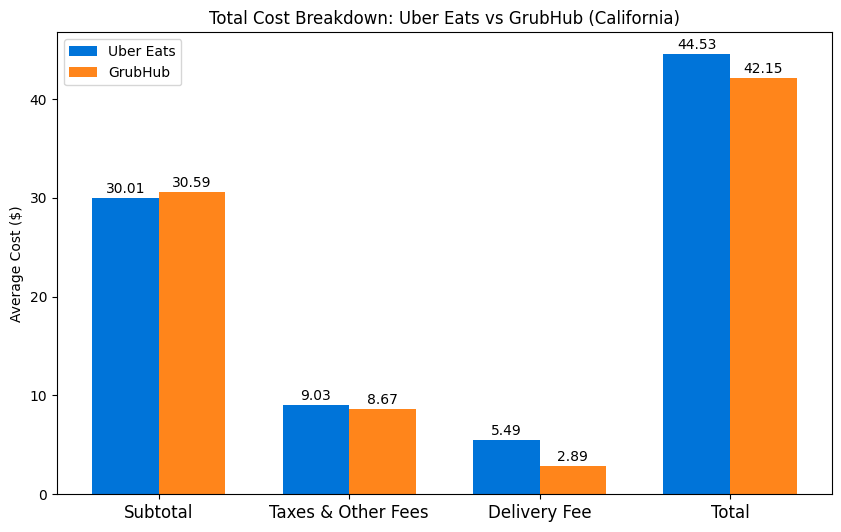

In [ ]:
for col in ['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']:
    uber_df[col] = uber_df[col].replace('[\$,]', '', regex=True).astype(float)
    grubhub_df[col] = grubhub_df[col].replace('[\$,]', '', regex=True).astype(float)

uber_avg = uber_df[['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']].mean()
grubhub_avg = grubhub_df[['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']].mean()
categories = ['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']
x = np.arange(len(categories))
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - bar_width/2, uber_avg, bar_width, label='Uber Eats', color='#0074D9')

ax.bar(x + bar_width/2, grubhub_avg, bar_width, label='GrubHub', color='#FF851B')
for i in range(len(categories)):
    ax.text(x[i] - bar_width/2, uber_avg[i] + 0.5, f'{uber_avg[i]:.2f}', ha='center', fontsize=10)
    ax.text(x[i] + bar_width/2, grubhub_avg[i] + 0.5, f'{grubhub_avg[i]:.2f}', ha='center', fontsize=10)

ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylabel('Average Cost ($)')
ax.set_title('Total Cost Breakdown: Uber Eats vs GrubHub (California)')
ax.legend()
plt.show()

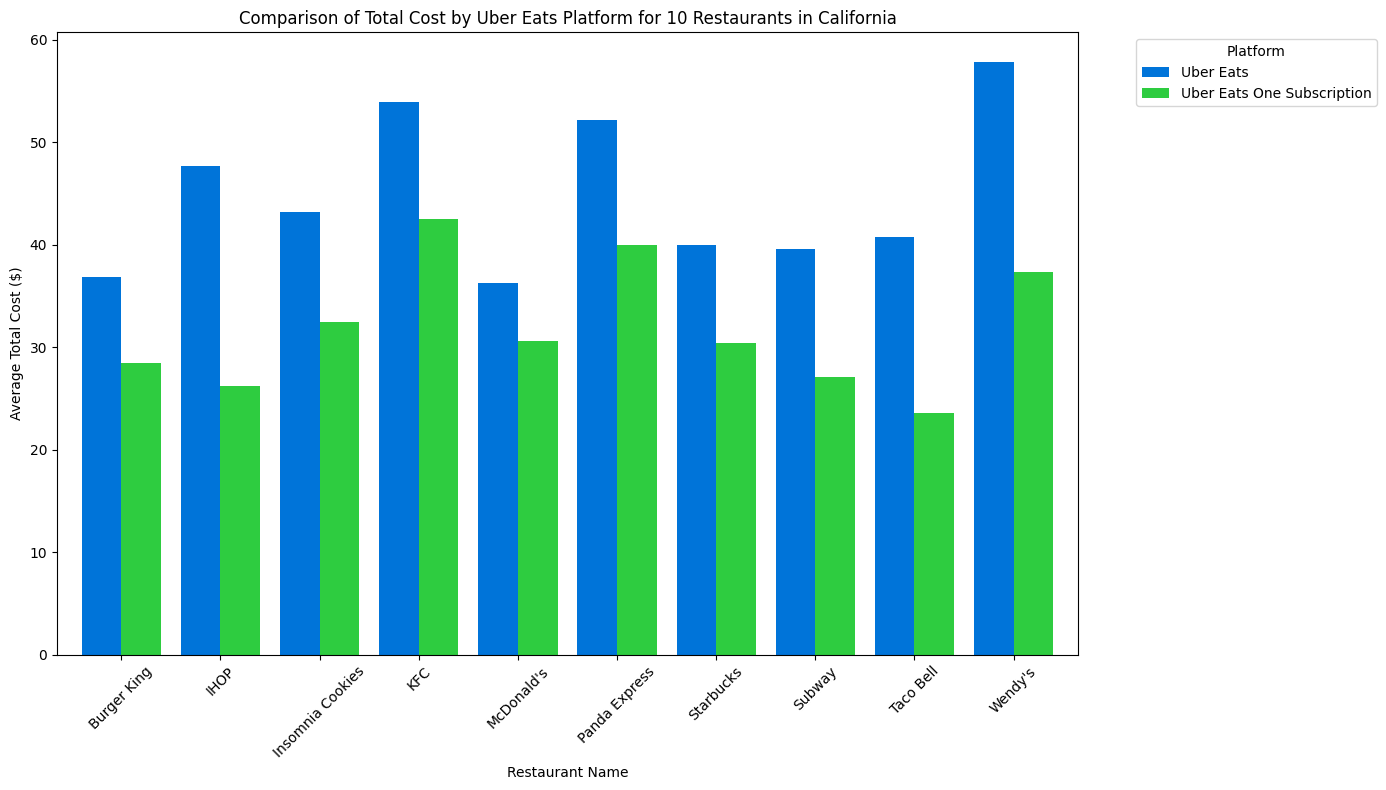

In [ ]:
grubhub_df = pd.read_csv('Grubhub_California_Orders.csv')
grubhub_premium_df = pd.read_csv('Grubhub_Premium_California_Orders.csv')
uber_df = pd.read_csv('UberEats_California_Orders.csv')
uber_premium_df = pd.read_csv('UberEats_Premium_California_Orders.csv')

for df in [grubhub_df, grubhub_premium_df, uber_df, uber_premium_df]:
    df['Total'] = df['Total'].replace('[\$,]', '', regex=True).astype(float)

def aggregate_data(df, platform_name):
    df['Platform'] = platform_name
    return df.groupby(['Restaurant Name', 'Platform'])['Total'].mean().reset_index()

grubhub_data = aggregate_data(grubhub_df, 'GrubHub')
grubhub_premium_data = aggregate_data(grubhub_premium_df, 'GrubHub Plus Subscription')
ubereats_data = aggregate_data(uber_df, 'Uber Eats')
ubereats_premium_data = aggregate_data(uber_premium_df, 'Uber Eats One Subscription')

all_data = pd.concat([grubhub_data, grubhub_premium_data, ubereats_data, ubereats_premium_data])
top_10_restaurants = all_data.groupby('Restaurant Name')['Total'].mean().nlargest(10).index
filtered_data = all_data[all_data['Restaurant Name'].isin(top_10_restaurants)]

ubereats_data_filtered = filtered_data[filtered_data['Platform'].str.contains('Uber Eats')]
grubhub_data_filtered = filtered_data[filtered_data['Platform'].str.contains('GrubHub')]

# 1. Grouped Bar Chart for Uber Eats
pivot_ubereats = ubereats_data_filtered.pivot_table(index='Restaurant Name', columns='Platform', values='Total', aggfunc='mean')
pivot_ubereats.plot(kind='bar', figsize=(14, 8), color=['#0074D9', '#2ECC40'], width=0.8)

plt.title('Comparison of Total Cost by Uber Eats Platform for 10 Restaurants in California')
plt.ylabel('Average Total Cost ($)')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=45)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

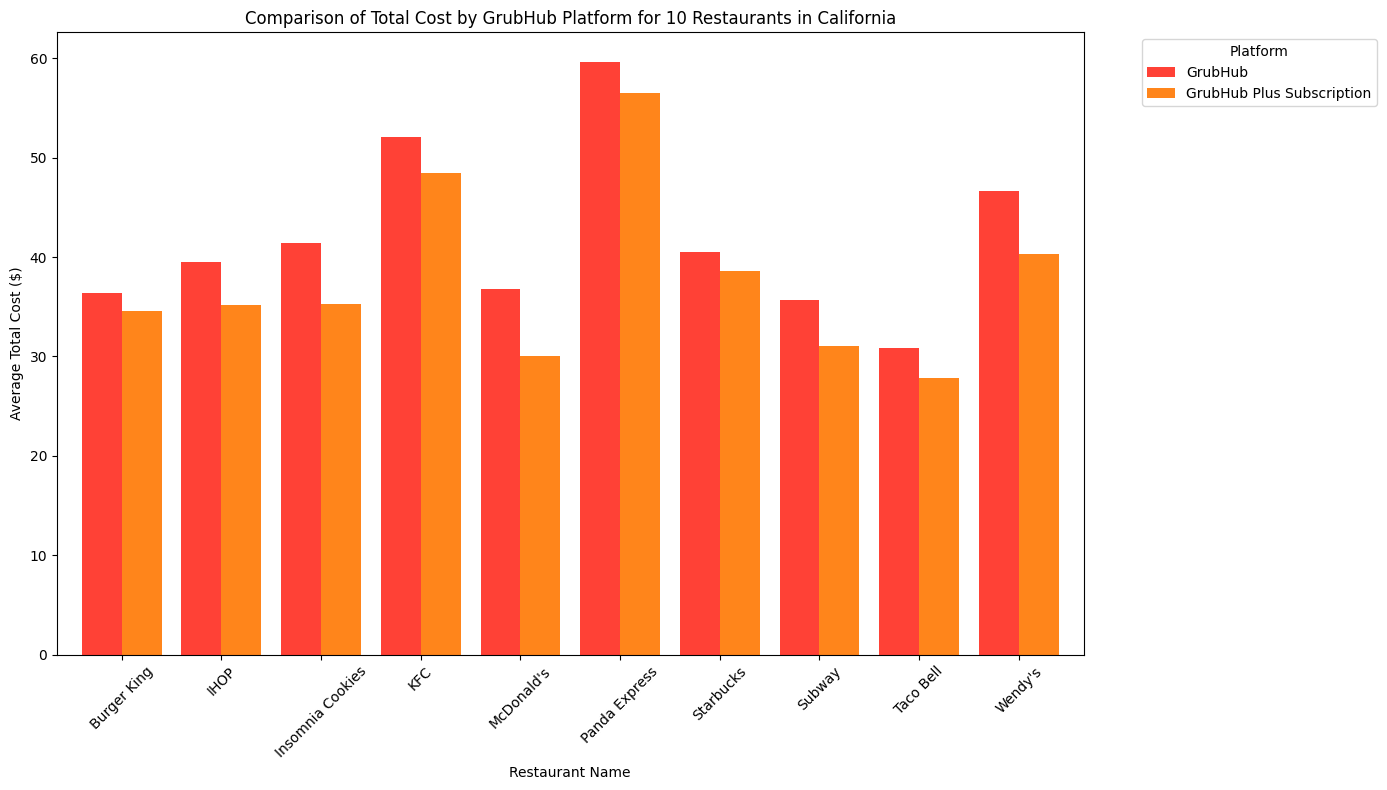

In [ ]:
# 2. Grouped Bar Chart for GrubHub
pivot_grubhub = grubhub_data_filtered.pivot_table(index='Restaurant Name', columns='Platform', values='Total', aggfunc='mean')
pivot_grubhub.plot(kind='bar', figsize=(14, 8), color=['#FF4136', '#FF851B'], width=0.8)

plt.title('Comparison of Total Cost by GrubHub Platform for 10 Restaurants in California')
plt.ylabel('Average Total Cost ($)')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=45)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-5-08c9961582d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Platform', y='Total', data=filtered_data, palette=['#FF4136', '#FF851B', '#0074D9', '#2ECC40'])


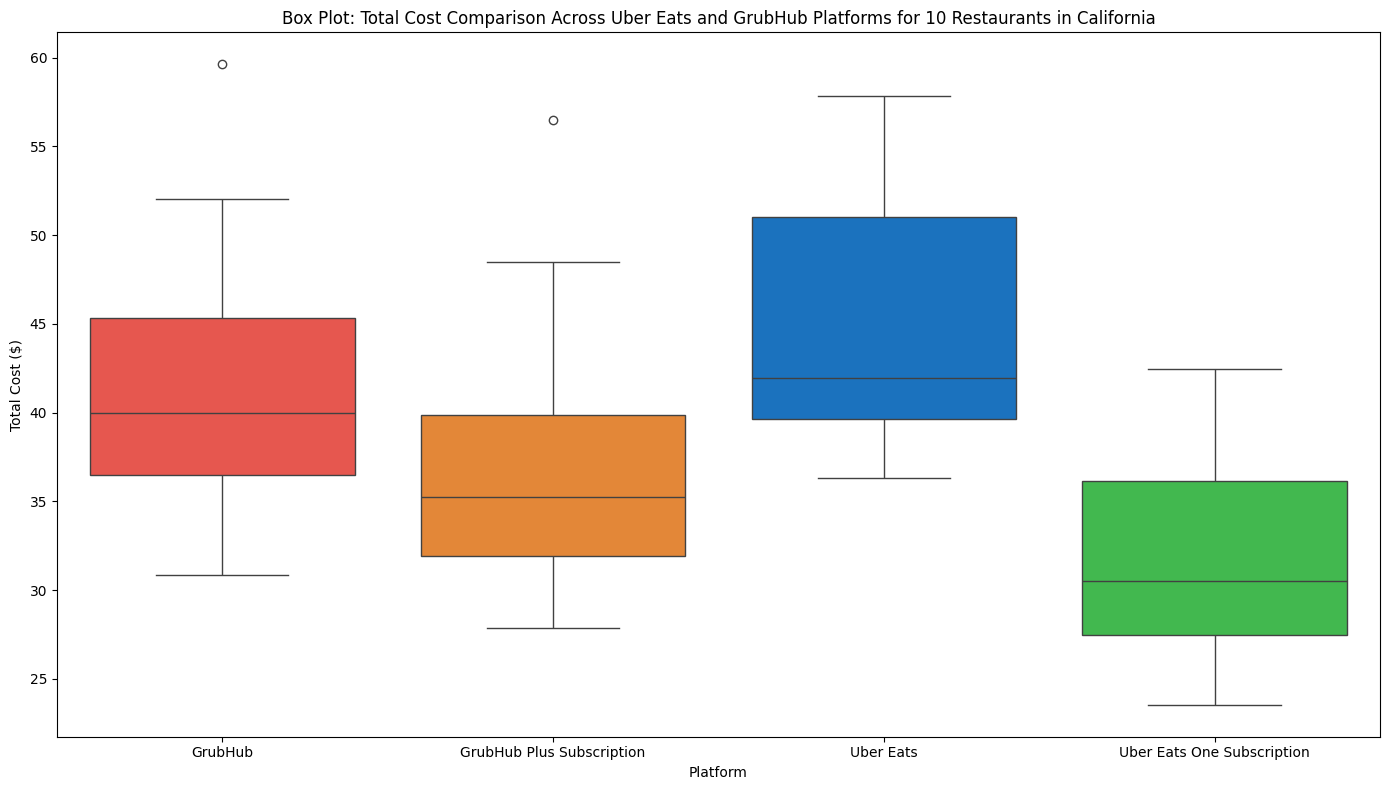

In [ ]:
# 3. Grouped Box Plot for Total cost across platforms
plt.figure(figsize=(14, 8))
sns.boxplot(x='Platform', y='Total', data=filtered_data, palette=['#FF4136', '#FF851B', '#0074D9', '#2ECC40'])
plt.title('Box Plot: Total Cost Comparison Across Uber Eats and GrubHub Platforms for 10 Restaurants in California')
plt.ylabel('Total Cost ($)')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()

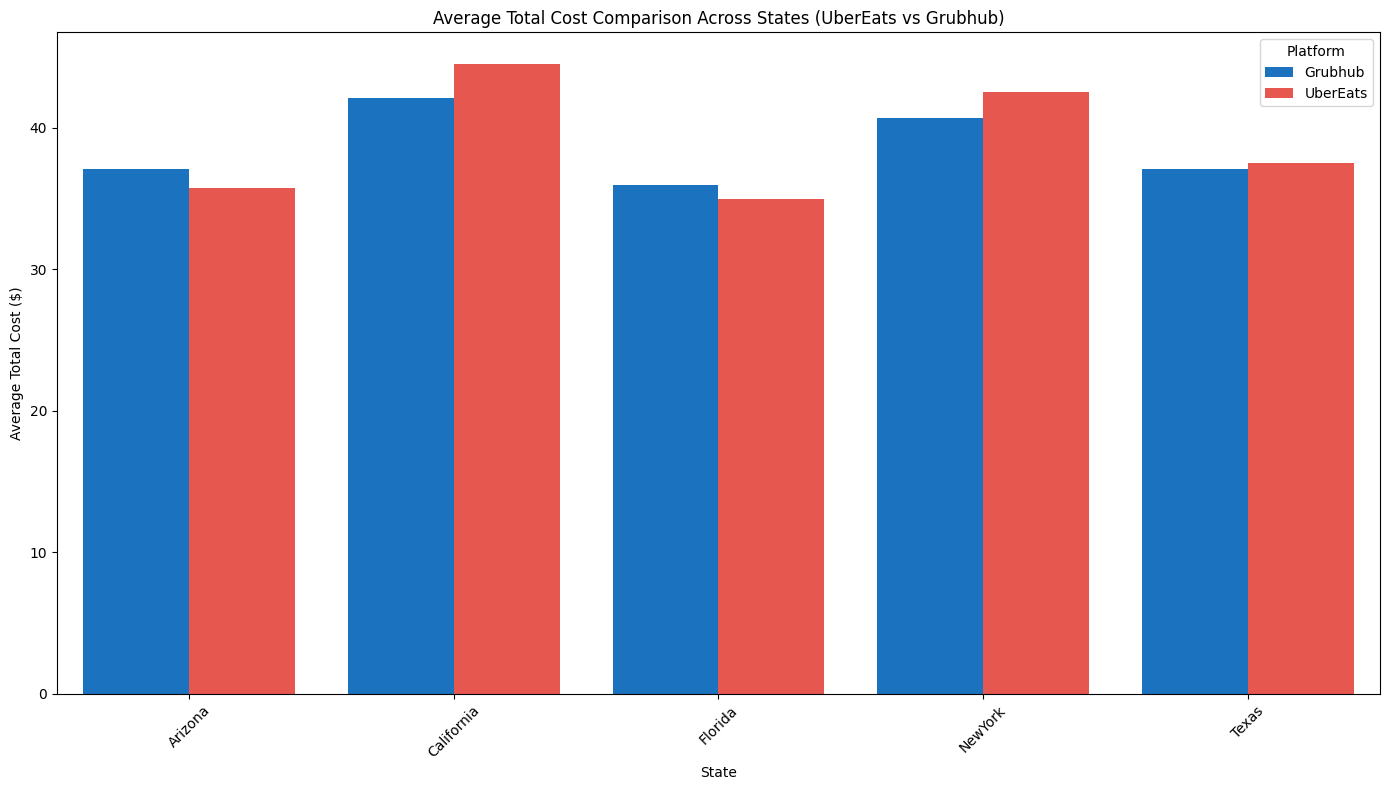

In [ ]:
states = ["California", "NewYork", "Texas", "Florida", "Arizona"]
apps = ["UberEats", "Grubhub"]

dataframes = []

for state in states:
    for app in apps:
        file_name = f"{app}_{state}_Orders.csv"
        df = pd.read_csv(file_name)
        df['State'] = state
        df['Platform'] = app
        df['Total'] = df['Total'].replace('[\$,]', '', regex=True).astype(float)

        dataframes.append(df)
all_states_data = pd.concat(dataframes, ignore_index=True)
statewise_aggregated = all_states_data.groupby(['State', 'Platform'])['Total'].mean().reset_index()

# 1. Grouped Bar Chart: Average Total Cost Comparison Across States for UberEats vs Grubhub
plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Total', hue='Platform', data=statewise_aggregated, palette=['#0074D9', '#FF4136'])

plt.title('Average Total Cost Comparison Across States (UberEats vs Grubhub)')
plt.ylabel('Average Total Cost ($)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

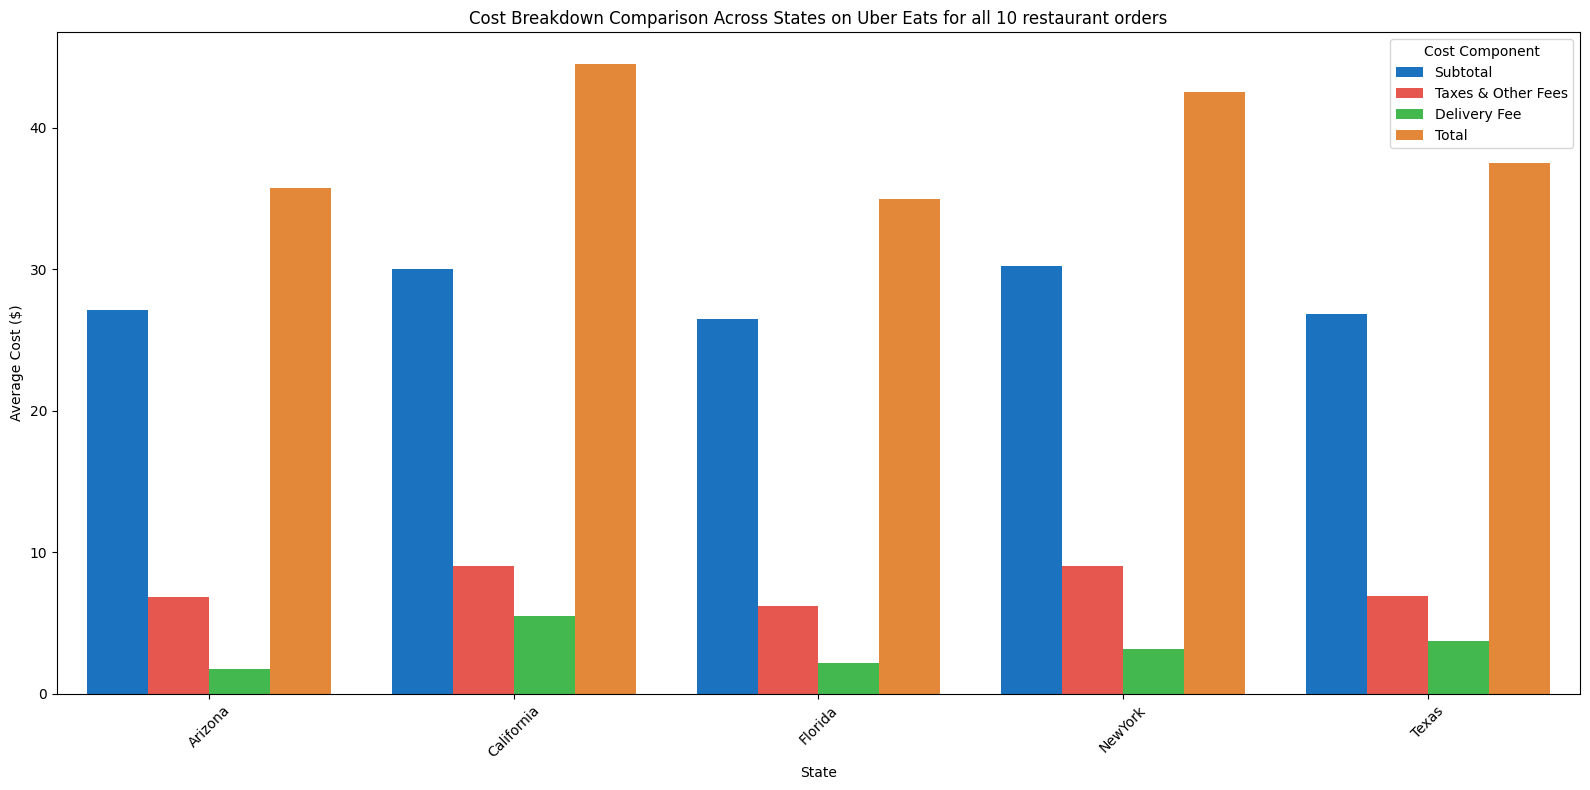

In [ ]:
states = ["California", "NewYork", "Texas", "Florida", "Arizona"]
app = "UberEats"
dataframes = []

for state in states:
    file_name = f"{app}_{state}_Orders.csv"
    df = pd.read_csv(file_name)
    df['State'] = state
    df['Platform'] = app

    for col in ['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']:
        df[col] = df[col].replace(['\$', 'Not Found'], '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    dataframes.append(df)
uber_data = pd.concat(dataframes, ignore_index=True)
statewise_comparison = uber_data.groupby(['State'])[['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']].mean().reset_index()

# 1. Grouped Bar Chart for Cost Components Across States for Uber Eats
plt.figure(figsize=(16, 8))
melted_data = statewise_comparison.melt(id_vars=['State'], value_vars=['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total'],
                                         var_name='Cost Component', value_name='Amount')

sns.barplot(x='State', y='Amount', hue='Cost Component', data=melted_data,
            palette=['#0074D9', '#FF4136', '#2ECC40', '#FF851B'])

plt.title('Cost Breakdown Comparison Across States on Uber Eats for all 10 restaurant orders')
plt.ylabel('Average Cost ($)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Cost Component')
plt.tight_layout()
plt.show()

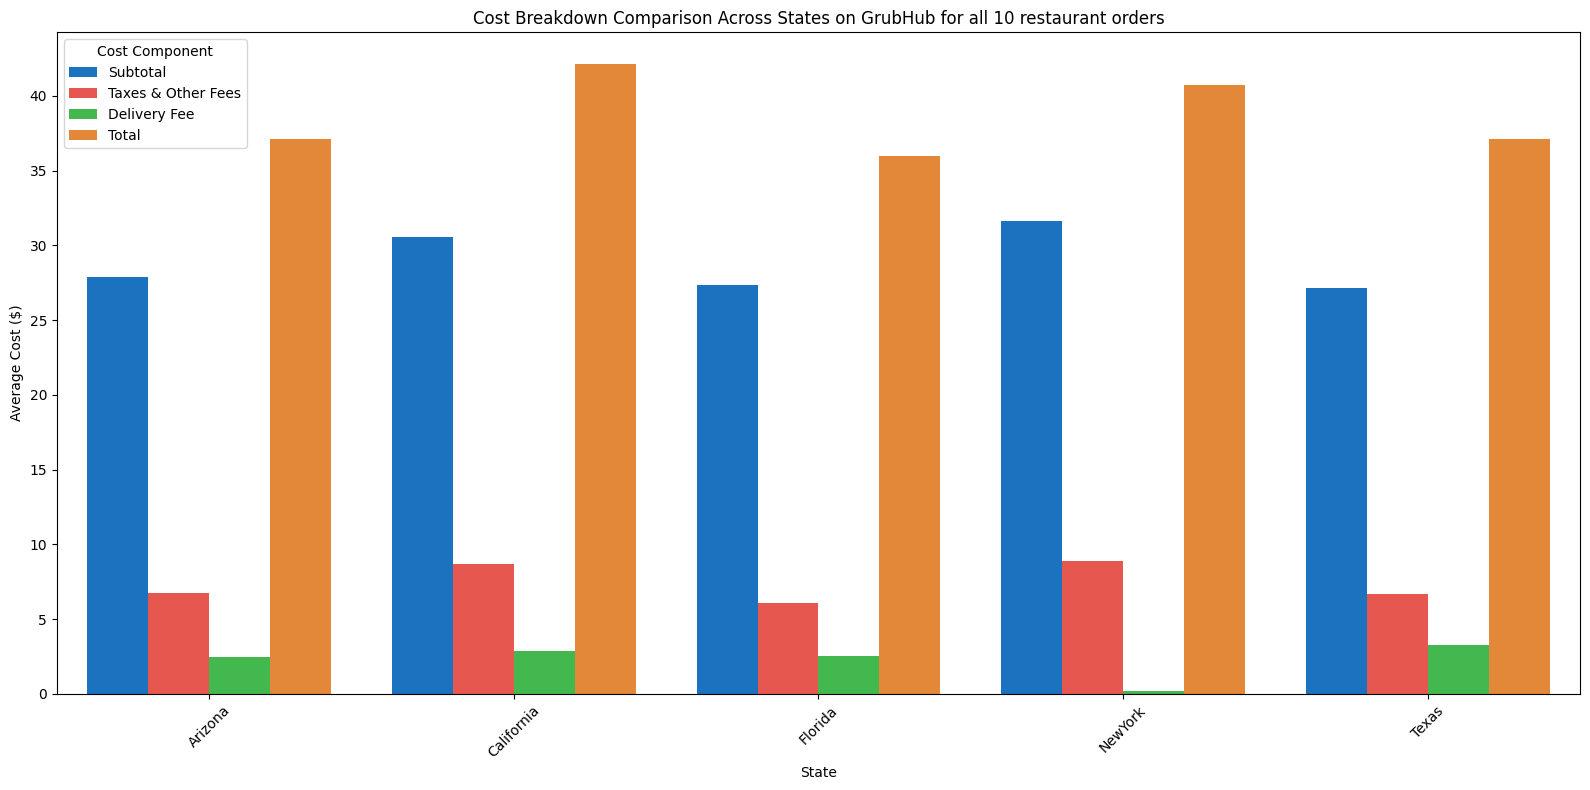

In [ ]:
app = "Grubhub"
dataframes = []

for state in states:
    file_name = f"{app}_{state}_Orders.csv"
    df = pd.read_csv(file_name)
    df['State'] = state
    df['Platform'] = app

    for col in ['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']:
        df[col] = df[col].replace(['\$', 'Not Found'], '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    dataframes.append(df)

grubhub_data = pd.concat(dataframes, ignore_index=True)
statewise_comparison = grubhub_data.groupby(['State'])[['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total']].mean().reset_index()

# 1. Grouped Bar Chart for Cost Components Across States for GrubHub
plt.figure(figsize=(16, 8))
melted_data = statewise_comparison.melt(id_vars=['State'], value_vars=['Subtotal', 'Taxes & Other Fees', 'Delivery Fee', 'Total'],
                                         var_name='Cost Component', value_name='Amount')
sns.barplot(x='State', y='Amount', hue='Cost Component', data=melted_data,
            palette=['#0074D9', '#FF4136', '#2ECC40', '#FF851B'])
plt.title('Cost Breakdown Comparison Across States on GrubHub for all 10 restaurant orders')
plt.ylabel('Average Cost ($)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Cost Component')
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

states = ["California", "NewYork", "Texas", "Florida", "Arizona"]
apps = ["UberEats", "Grubhub"]
all_data = []

for state in states:
    for app in apps:
        file_path = f"/content/{app}_{state}_Orders.csv"
        df = pd.read_csv(file_path)

        for col in ["Price", "Subtotal", "Delivery Fee", "Taxes & Other Fees", "Total"]:
            df[col] = df[col].replace("[\$,]", "", regex=True).replace("Not Found", np.nan).astype(float)

        df.dropna(inplace=True)
        df["State"] = state
        df["App"] = app
        all_data.append(df)

final_df = pd.concat(all_data, ignore_index=True)
model = ols("Total ~ C(App) + C(State) + C(App):C(State)", data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table["Significance"] = ["✅ Significant" if p < 0.05 else "❌ Not Significant" for p in anova_table["PR(>F)"]]

print("\n🔹 **Two-Way ANOVA: Impact of App & State on Total Cost** 🔹")
print(anova_table.rename(columns={"sum_sq": "Sum of Squares", "df": "Degrees of Freedom", "F": "F-Statistic", "PR(>F)": "p-Value"}))


🔹 **Two-Way ANOVA: Impact of App & State on Total Cost** 🔹
                 Sum of Squares  Degrees of Freedom  F-Statistic  \
C(App)                15.964578                 1.0     0.211489   
C(State)            3673.959112                 4.0    12.167608   
C(App):C(State)      223.923045                 4.0     0.741600   
Residual           28382.912270               376.0          NaN   

                      p-Value       Significance  
C(App)           6.458684e-01  ❌ Not Significant  
C(State)         2.597813e-09      ✅ Significant  
C(App):C(State)  5.641032e-01  ❌ Not Significant  
Residual                  NaN  ❌ Not Significant  
